# Assignment - Group 13

#### Loading Data

In [3]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
#df = pd.read_csv('NYC_Restaurants.csv', dtype=str)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


_______________________________________________________________________________________________________________________________
### Q1

In [4]:
labels = pd.read_csv('labels.txt',
                       sep='	',
                       header=None,
                       names=['turk', 'url', 'category'],
                       engine='python')

labels

gold = pd.read_csv('gold.txt',
                       sep='	',
                       header=None,
                       names=['url', 'category'],
                       engine='python')

gold[:10]

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
5,http://3x-pix.com,X
6,http://4d.com,G
7,http://4neurons.com,G
8,http://4-panama-city-beach-condo.com/index.htm,G
9,http://4whw.8m.net/,X


_______________________________________________________________________________________________________________________________
### Q2

In [5]:
list_of_gold_url=gold["url"].unique()

def processing_function(url):
    return url in list_of_gold_url

def processing_function2(url):
    return url not in list_of_gold_url

labels_on_gold = labels[labels["url"].map(processing_function)].drop_duplicates()

labels_unknown = labels[labels["url"].map(processing_function2)].drop_duplicates()

labels_on_gold

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G
...,...,...,...
91766,A35CBDDGBM7T6E,http://yousendit.com,G
91767,A3J86MK3VIE6ST,http://yousendit.com,G
91768,A4GP97LAQCCHJ,http://yousendit.com,G
91769,AAQNUEUU7H1Y5,http://yousendit.com,G


_______________________________________________________________________________________________________________________________
### Q3

In [6]:
labels_processing=labels_on_gold.merge(gold, left_on='url', right_on='url')

labels_processing["corrected"] = labels_processing["category_x"] == labels_processing["category_y"]
labels_processing = labels_processing[["turk", "corrected"]]
correct_counts = labels_processing.groupby("turk")["corrected"].sum()
total_counts = labels_processing["turk"].value_counts()


avg_correctness = correct_counts/total_counts
rater_goodness = pd.DataFrame({"numberofratings": total_counts, "average_correctness": avg_correctness})
rater_goodness[:10]

,numberofratings,average_correctness
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973
A1554ZM0CLKSG5,1,1.000000


_______________________________________________________________________________________________________________________________
### Q4

In [7]:
def process_function(mean):
    return mean/(1.001-mean)

rater_goodness['odds']=rater_goodness['average_correctness'].map(process_function)
rater_goodness[:10]


,numberofratings,average_correctness,odds
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369
A1554ZM0CLKSG5,1,1.000000,1000.000000


____________________________________________________________________________________________________________________________
### Q5

In [8]:
filter_set=rater_goodness[rater_goodness["numberofratings"]>=20]
filter_set_sorted=filter_set.sort_values(by="average_correctness", ascending=False)
filter_set_sorted[:10]

,numberofratings,average_correctness,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


____________________________________________________________________________________________________________________________
### Q6

                             OLS Regression Results                            
Dep. Variable:     average_correctness   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5414
Date:                 Tue, 02 Aug 2022   Prob (F-statistic):              0.463
Time:                         21:09:33   Log-Likelihood:                -94.561
No. Observations:                  269   AIC:                             193.1
Df Residuals:                      267   BIC:                             200.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6438      

Text(0, 0.5, 'Average correctness')

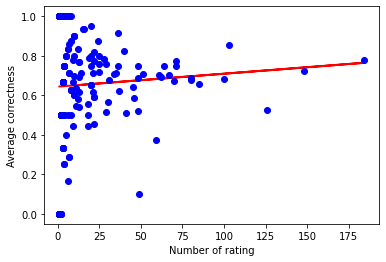

In [9]:
# plot the 2 variables ot figure out the relationship

#try using linear model
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('average_correctness ~ numberofratings', data=rater_goodness, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
result.pvalues

x = rater_goodness['numberofratings']
y_actual = rater_goodness['numberofratings']
y_expected = result.params['Intercept'] + result.params['numberofratings'] * x


plot(x, y_expected, color='red', linewidth=2, label='Regression')
plot(rater_goodness['numberofratings'],rater_goodness['average_correctness'],marker='o',linestyle='None',color='blue')
xlabel('Number of rating')
ylabel('Average correctness')

#this does not seem to be a good fit with High P value and low R squared, so there is no clear relation here

____________________________________________________________________________________________________________________________
### Q7

In [14]:
number=labels_on_gold['turk'].value_counts().quantile(0.75)

list_turk=labels_on_gold['turk'].value_counts()


#list_check=list_turk[list_turk>=number]
list_check=list_turk[list_turk>number]

def filter_fn(inp):
    return inp in list_check

labels_unknown_filtered=labels_unknown[labels_unknown['turk'].map(filter_fn)]

rater_goodness_new=rater_goodness.reset_index()
rater_goodness_filter=rater_goodness_new[rater_goodness_new['index'].map(filter_fn)]

processed=labels_unknown_filtered.merge(rater_goodness_filter, left_on='turk', right_on='index')
grouped=processed.groupby(['url', 'category'])[['odds']].prod()
grouped

66


odds
url                         category           
http://0-101.net            G          2.297602
http://000.cc               G          1.485456
http://0000.jp              G         14.339248
http://000relationships.com G          3.841962
                            P          1.851852
...                                         ...
http://zynga.com            G          3.666513
http://zz868.com            G          1.047852
                            P          1.851852
http://zzx.cc               G          1.417620
                            X          1.620746

[13983 rows x 1 columns]

____________________________________________________________________________________________________________________________
### Q8

In [11]:
result_75_processing=grouped.groupby(['url'])[['odds']].max()
grouped_indexed=grouped.reset_index()

processed_75=grouped_indexed.merge(result_75_processing, left_on=['url','odds'], right_on=['url','odds'])
result_75=processed_75.rename(columns={"category": "top category", "odds": "top odds"})
result_75=result_75.set_index('url')
result_75

,top category,top odds
url,,
http://0-101.net,G,2.297602
http://000.cc,G,1.485456
http://0000.jp,G,14.339248
http://000relationships.com,G,3.841962
http://000vitamins.com,G,4.033641
...,...,...
http://zwinky.com,G,17.201875
http://zylom.com,G,1.849543
http://zynga.com,G,3.666513


____________________________________________________________________________________________________________________________
### Q9

In [12]:
#25 percentile work------------------------
number=labels_on_gold['turk'].value_counts().quantile(0.25)
list_turk=labels_on_gold['turk'].value_counts()

#list_check=list_turk[list_turk>=number]
list_check=list_turk[list_turk>number]

def filter_fn(inp):
    return inp in list_check

labels_unknown_filtered=labels_unknown[labels_unknown['turk'].map(filter_fn)]

rater_goodness_new=rater_goodness.reset_index()
rater_goodness_filter=rater_goodness_new[rater_goodness_new['index'].map(filter_fn)]

processed=labels_unknown_filtered.merge(rater_goodness_filter, left_on='turk', right_on='index')
grouped=processed.groupby(['url', 'category'])[['odds']].prod()

result_25_processing=grouped.groupby(['url'])[['odds']].max()
grouped_indexed=grouped.reset_index()

processed_25=grouped_indexed.merge(result_25_processing, left_on=['url','odds'], right_on=['url','odds'])
result_25=processed_25.rename(columns={"category": "top category", "odds": "top odds"})
result_25=result_25.set_index('url')


merged_df=result_25.merge(result_75, left_on='url', right_on='url',how='outer')

merged_df_final=merged_df.rename(columns={"top category_x": "top_Category_25", "top category_y": "top_Category_75"})
pd.crosstab(index=merged_df_final['top_Category_25'],columns=merged_df_final['top_Category_75'])

#most errors are in category 'G'

top_Category_75,G,P,R,X
top_Category_25,,,,
G,8280,199,22,28
P,587,354,34,5
R,182,52,127,28
X,215,25,28,456
